In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()

irisdf=pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length', 'petal_width'])
irisdf.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisdf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [5]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
irisdf['target']=iris.target
irisdf['cluster']=kmeans.labels_
iris_result=irisdf.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)
irisdf['pca_x']=pca_transformed[:,0]
irisdf['pca_y']=pca_transformed[:,1]
irisdf.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


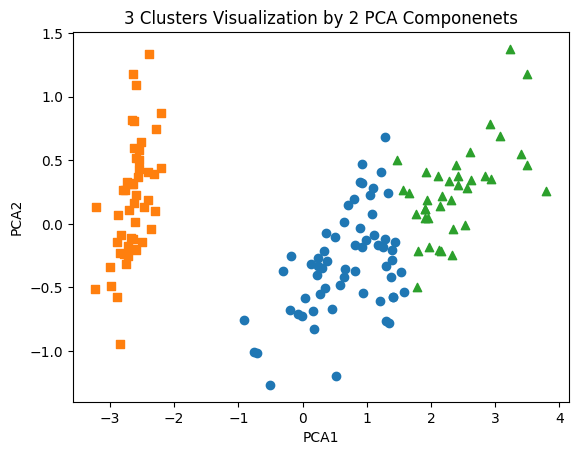

In [9]:
marker0_ind=irisdf[irisdf['cluster']==0].index
marker1_ind=irisdf[irisdf['cluster']==1].index
marker2_ind=irisdf[irisdf['cluster']==2].index

plt.scatter(x=irisdf.loc[marker0_ind, 'pca_x'], y=irisdf.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisdf.loc[marker1_ind, 'pca_x'], y=irisdf.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisdf.loc[marker2_ind, 'pca_x'], y=irisdf.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('3 Clusters Visualization by 2 PCA Componenets')
plt.show()

In [11]:
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts= np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [12]:
clusterdf=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterdf['target']=y
clusterdf.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


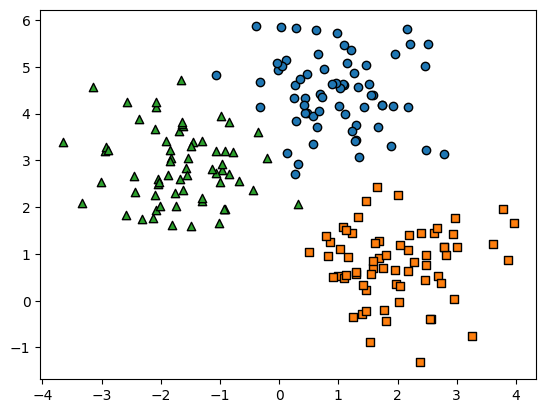

In [13]:
target_list=np.unique(y)

markers=['o','s','^','P','D','H','x']

for target in target_list:
  target_cluster=clusterdf[clusterdf['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
              marker=markers[target])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


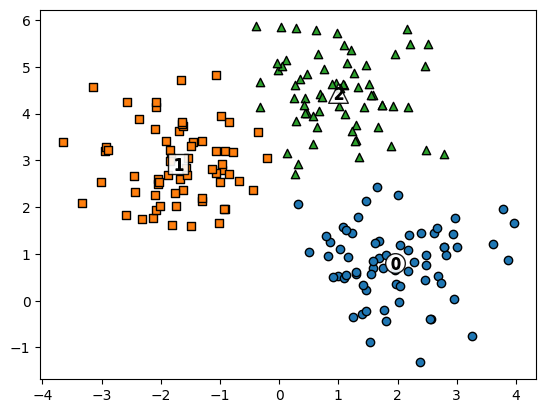

In [21]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterdf['kmeans_label']=cluster_labels

centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster=clusterdf[clusterdf['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)


In [22]:
print(clusterdf.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


In [26]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisdf=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisdf)
irisdf['cluster']=kmeans.labels_

score_samples=silhouette_samples(iris.data, irisdf['cluster'])
print('silhouette_coeff() return 값의 shape', score_samples.shape)

irisdf['silhouette_coeff']=score_samples
average_score=silhouette_score(iris.data, irisdf['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisdf.head(3)

silhouette_coeff() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [27]:
irisdf.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.417320
1,0.798140
2,0.451105


In [28]:
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형: ', np.unique(cluster_labels))

cluster labels 유형:  [0 1 2 3 4 5]


In [29]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [31]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값: ', round(bandwidth,3))

bandwidth 값:  1.816


In [32]:
df=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
df['target']=y

best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


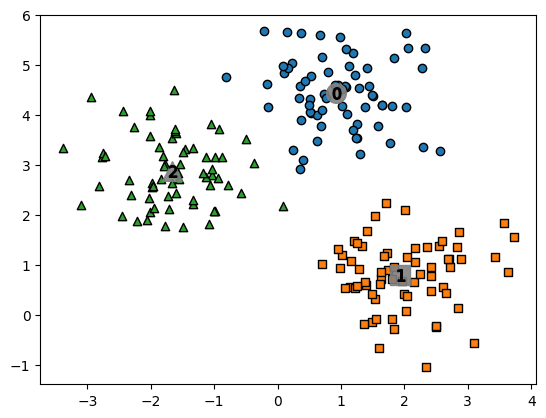

In [34]:
df['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=df[df['meanshift_label']==label]
  center_x_y=centers[label]

  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)

plt.show()

In [35]:
print(df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64
